Assignment: 

Module: Data Mining and ML
Week2 Lab

"Assignment reads Energy_consumption.csv file that has energy consumption of a room along with renewable energy and various other variables like temperature, humidity, room area, Light, AC usage, occupancy, date with time etc."

"Objective of this assignment is to read the data file, understand the data, pre-process, feature engineer and perform analysis on data with some visualization" 


In [115]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [116]:
# Read the data
df = pd.read_csv("Energy_consumption.csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [117]:
# check the shape of the data
df.shape

(1007, 11)

Inference: Dataset has 1007 records and 11 fields

In [118]:
# check for the Summary - datatype, fields, nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1007 non-null   object 
 1   Temperature        1006 non-null   float64
 2   Humidity           1003 non-null   float64
 3   SquareFootage      1007 non-null   float64
 4   Occupancy          1007 non-null   int64  
 5   HVACUsage          1007 non-null   object 
 6   LightingUsage      1007 non-null   object 
 7   RenewableEnergy    1003 non-null   float64
 8   DayOfWeek          1007 non-null   object 
 9   Holiday            1007 non-null   object 
 10  EnergyConsumption  1007 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.7+ KB


Inference:
- There are 1007 entries in  the data set with 11 fields of both numerical and categorical variables
- Furthermore, there are 3 fields with null values in Temperature, Humidity, and RenewableEnergy fields

In [119]:
# Distplay the 10 rows
df.head(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,01/01/2022 05:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,01/01/2022 06:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791
7,01/01/2022 07:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906
8,01/01/2022 08:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236
9,01/01/2022 09:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214


In [120]:
# Check for nulls
df.isnull().sum().sort_values(ascending=False)

Humidity             4
RenewableEnergy      4
Temperature          1
Timestamp            0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

Inference: There are 4 records found as null im Humidity and RenewableEnergy fields. Similarly, a record null in Temperature Field

In [121]:
# Analyze the nulls
df[df.isnull().any(axis=1)]

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
20,01/01/2022 20:00,NaN,59.931895,1211.261802,9,On,On,11.703978,Friday,Yes,94.236288
51,03/01/2022 02:00,21.754026,NaN,1514.827037,4,Off,Off,9.846127,Tuesday,No,62.055055
64,03/01/2022 15:00,25.382745,51.902700,1350.756585,0,Off,Off,NaN,Tuesday,No,78.187281
120,05/01/2022 23:00,27.308422,NaN,1239.620280,8,Off,On,22.210965,Monday,Yes,81.190938
282,12/01/2022 17:00,29.248673,NaN,1025.039867,4,On,Off,25.683314,Thursday,Yes,91.490982
295,13/01/2022 06:00,21.841437,57.528479,1214.575550,1,Off,Off,NaN,Sunday,Yes,71.369356
403,17/01/2022 18:00,22.234646,NaN,1855.502668,3,Off,Off,25.987465,Wednesday,Yes,60.541460
417,18/01/2022 08:00,20.572217,43.972162,1828.686036,5,On,On,NaN,Tuesday,No,71.594942
988,10/02/2022 22:00,24.643517,35.280929,1728.931522,5,Off,On,NaN,Sunday,No,75.146012


Inference: After analyzing the data, all these nulls are from continuous variables and can be replaced by mean of it's respective column

In [122]:
# Fill the NaN values with mean values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum().sort_values(ascending=False)

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

Inference: Replaced the null values of the fields with its respective mean and verified the data frame

In [123]:
# Analyze the nulls again
df[df.isnull().any(axis=1)]

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption


In [124]:
# Timestamp field is found to categorical field
# Creating new fields from the Timestamp field
df['year'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').year)
df['month'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').month)
df['day'] = df['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').day)
df['yr_mth'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
df.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,year,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022,1,1,2022-01


Inference: Added new field yr_mth and day for further analysis

In [125]:
# Dropping year individual columns as data has 1 year worth data
df.drop(columns=['year'], axis=1, inplace=True)
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,1,1,2022-01


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1007 non-null   object 
 1   Temperature        1007 non-null   float64
 2   Humidity           1007 non-null   float64
 3   SquareFootage      1007 non-null   float64
 4   Occupancy          1007 non-null   int64  
 5   HVACUsage          1007 non-null   object 
 6   LightingUsage      1007 non-null   object 
 7   RenewableEnergy    1007 non-null   float64
 8   DayOfWeek          1007 non-null   object 
 9   Holiday            1007 non-null   object 
 10  EnergyConsumption  1007 non-null   float64
 11  month              1007 non-null   int64  
 12  day                1007 non-null   int64  
 13  yr_mth             1007 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 110.3+ KB


In [127]:
# Check for any duplicate data
df[df.duplicated()].shape

# Drop duplicate records
df.drop_duplicates(inplace=True)

df[df.duplicated()].shape

(0, 14)

In [128]:
df.shape

(1000, 14)

Inference: There were 7 as is duplicate records and has been deleted

In [129]:
# Check the stats of the data now
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,month,day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,24.978303,45.377262,1500.052488,4.581000,15.134845,77.055873,1.25600,13.400000
std,2.834401,8.508062,288.418873,2.865598,8.705801,8.144112,0.43664,9.037792
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,1.00000,1.000000
25%,22.645070,38.297722,1247.108548,2.000000,7.666784,71.544690,1.00000,6.000000
50%,24.751637,45.795854,1507.967426,5.000000,15.131404,76.943696,1.00000,11.000000
75%,27.413903,52.382710,1740.340165,7.000000,22.706039,82.921742,2.00000,21.000000
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,2.00000,31.000000


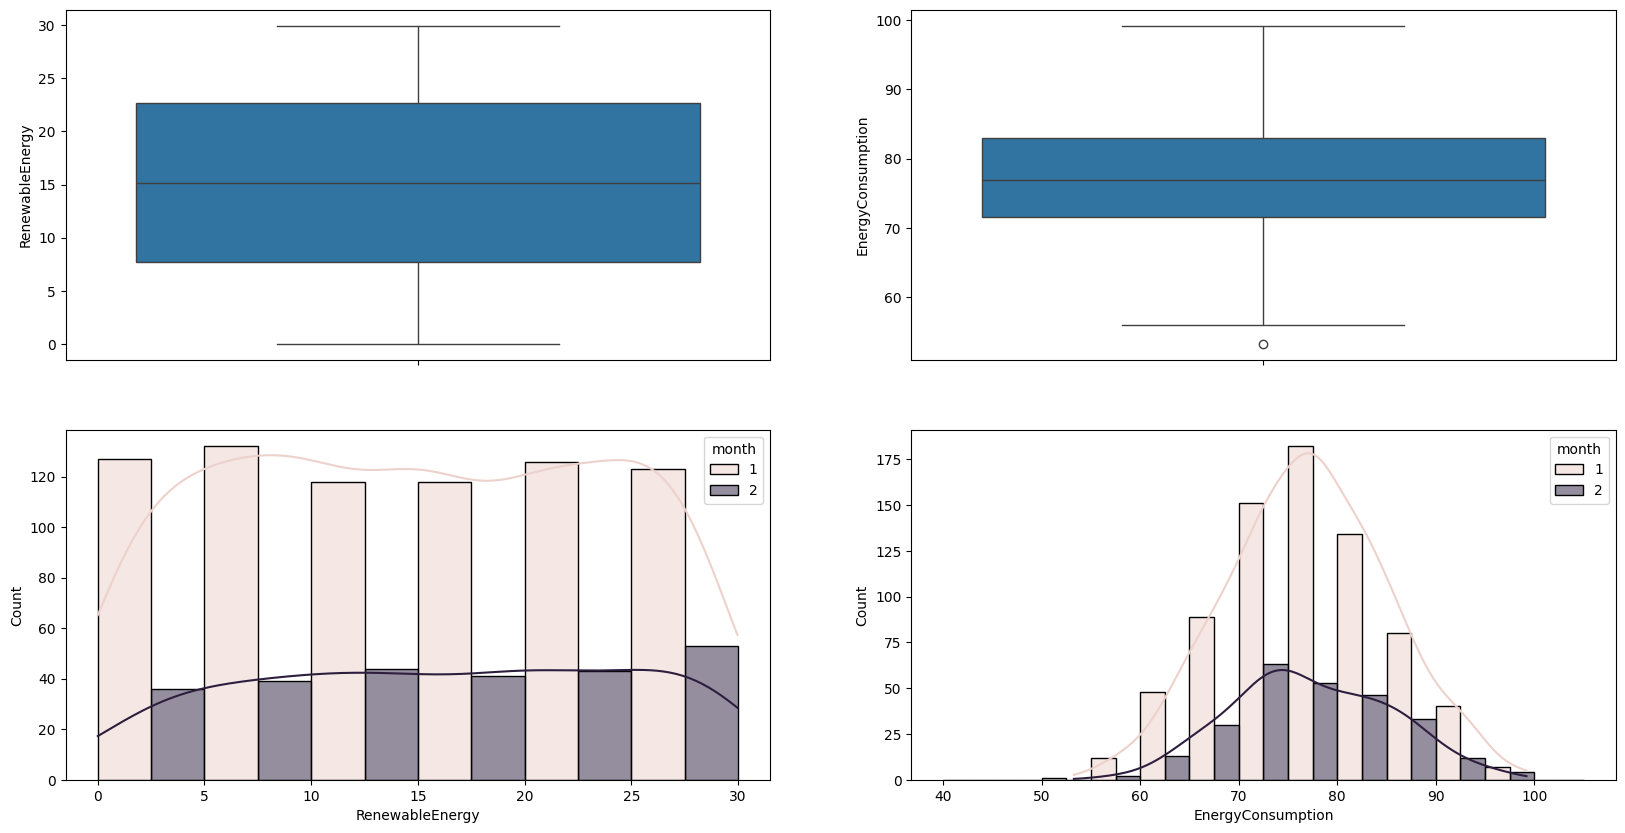

In [130]:
# Distribution of RenewableEnergy and EnergyConsumption fields
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(df['RenewableEnergy'])
plt.subplot(2,2,2)
sns.boxplot(df['EnergyConsumption'])
plt.subplot(2,2,3)
sns.histplot(data=df, x='RenewableEnergy', kde=True, hue='month', multiple='dodge', bins=np.arange(0,35,5))
plt.subplot(2,2,4)
sns.histplot(data=df, x='EnergyConsumption', kde=True, hue='month', multiple='dodge', bins=np.arange(40,110,5))
plt.show()

<Axes: ylabel='count'>

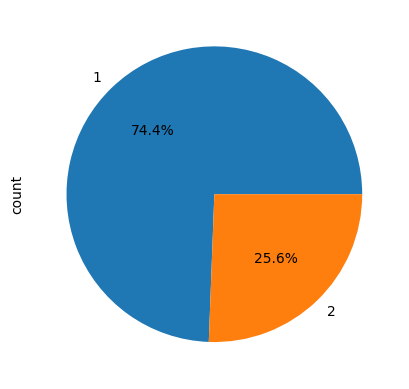

In [131]:
# Check the distribution of month
df['month'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Inference: 
- Renewable Energy is observed to uniformly distributed
- Energy consumption is normally distributed with majority of the consumption around the mean 75-80
- However, an outlier is observed in Energy consumption that is falling below the lower IQR
- Distribution of data is 75% for Jan month and 25% for Feb

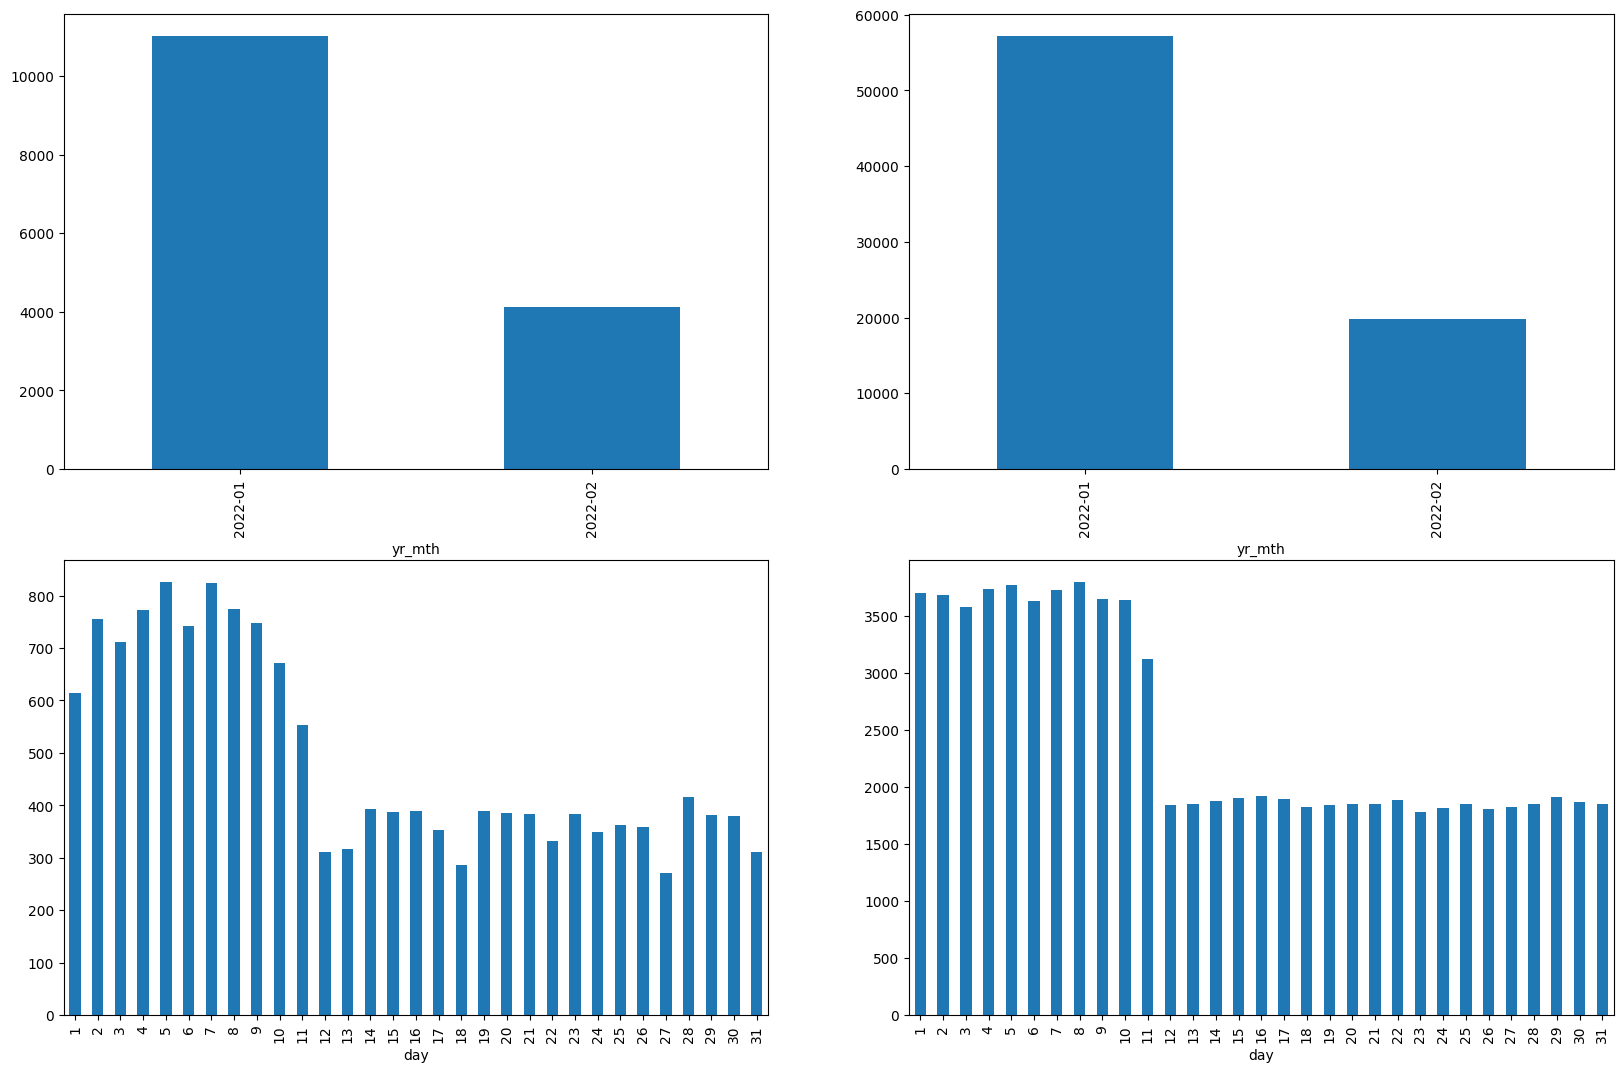

In [132]:
# Energy consumption by month, days
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
df.groupby('yr_mth')['RenewableEnergy'].sum().plot(kind='bar')
plt.subplot(2,2,2)
df.groupby('yr_mth')['EnergyConsumption'].sum().plot(kind='bar')
plt.subplot(2,2,3)
df.groupby('day')['RenewableEnergy'].sum().plot(kind='bar')
plt.subplot(2,2,4)
df.groupby('day')['EnergyConsumption'].sum().plot(kind='bar')
plt.show()

Inference: 
- January month shows highest energy and renewable energy consumption compared to Februrary
- Furthermore, Initial 11 days of the jan and feb months have more energy consumption when compared to other days of the month

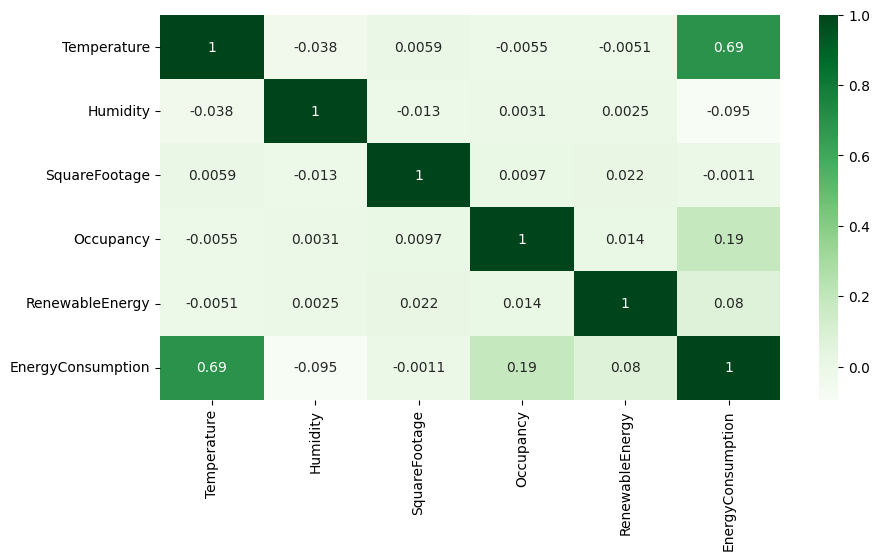

In [133]:
# Correlation between fields Temperature, Humidity, SquareFootage, Occupancy, RenewableEnergy, EnergyConsumption
plt.figure(figsize=(10, 5))
sns.heatmap(df[["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy", "EnergyConsumption"]].corr(), cmap='Greens', annot=True)
plt.show()

<Figure size 1000x700 with 0 Axes>

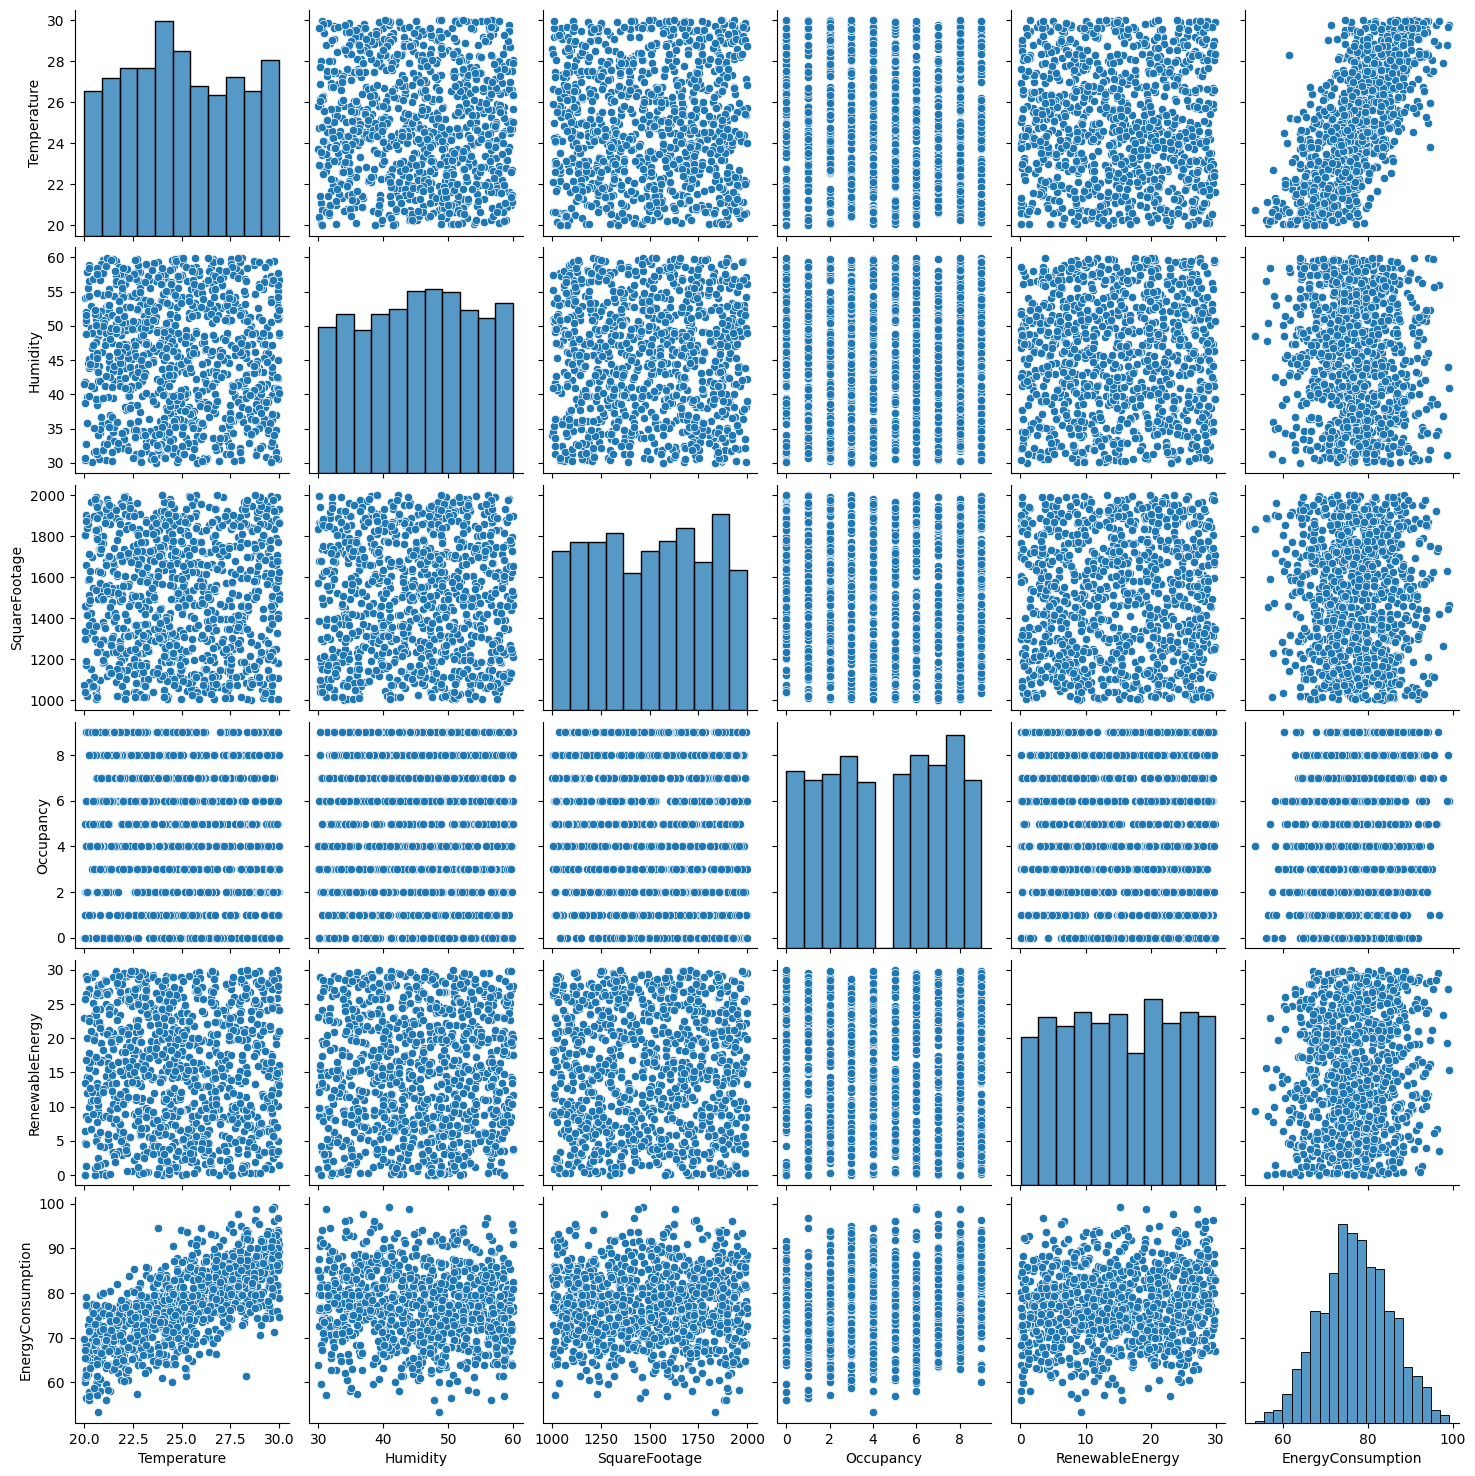

In [134]:
# Correlation between fields Temperature, Humidity, SquareFootage, Occupancy, RenewableEnergy, EnergyConsumption
plt.figure(figsize=(10, 7))
sns.pairplot(df[["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy", "EnergyConsumption"]])
plt.show()

Inference:
- Temperature field is found to be positvely correlated and draws a linear relation with "EnergyConsumption" variable.
- Rest fields (Humidity, SquareFootage, Occupancy, RenewableEnergy) are not found to be greatly correlated with the target variable "EnergyConsumption".
- However, when compared, "Occupancy" and "RenewableEnergy" fields are found to be drawing some relation.

In [135]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,1,1,2022-01


In [136]:
# Feature Extraction: Encode HVACUsage, LightingUsage, and Holiday columns with Label Encoding
label_encoder = LabelEncoder()

# df['HVACUsage'] = label_encoder.fit_transform(df['HVACUsage'])

cols = ['HVACUsage', 'LightingUsage', 'Holiday']
for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732,1,1,2022-01


Inference: Since the HVACUsage, LightingUsage, and Holiday fields are categorical type and can be useful as feature variables at later stage, encoding it through label encoder

In [137]:
# Feature Extraction: Encode dayOfWeek field with one hot encoding
df = pd.get_dummies(data=df, columns=['DayOfWeek'])
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,yr_mth,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,1,1,2022-01,False,True,False,False,False,False,False
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,1,2022-01,False,False,True,False,False,False,False
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,1,1,2022-01,False,False,False,True,False,False,False
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,1,1,2022-01,False,False,False,False,False,False,True
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,1,1,2022-01,True,False,False,False,False,False,False


Inference:
Performing one hot encoding to Day of Week column

In [138]:
# Map the fields with either 1 or 0 i.e 0: False, 1: True

df[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', \
   'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']] = \
      df[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', \
   'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']].astype(int)
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,yr_mth,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,1,1,2022-01,0,1,0,0,0,0,0
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,1,2022-01,0,0,1,0,0,0,0
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,1,1,2022-01,0,0,0,1,0,0,0
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,1,1,2022-01,0,0,0,0,0,0,1
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,1,1,2022-01,1,0,0,0,0,0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1005
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1000 non-null   object 
 1   Temperature          1000 non-null   float64
 2   Humidity             1000 non-null   float64
 3   SquareFootage        1000 non-null   float64
 4   Occupancy            1000 non-null   int64  
 5   HVACUsage            1000 non-null   int64  
 6   LightingUsage        1000 non-null   int64  
 7   RenewableEnergy      1000 non-null   float64
 8   Holiday              1000 non-null   int64  
 9   EnergyConsumption    1000 non-null   float64
 10  month                1000 non-null   int64  
 11  day                  1000 non-null   int64  
 12  yr_mth               1000 non-null   object 
 13  DayOfWeek_Friday     1000 non-null   int64  
 14  DayOfWeek_Monday     1000 non-null   int64  
 15  DayOfWeek_Saturday   1000 non-null   int64 

In [140]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.978303,45.377262,1500.052488,4.581000,0.492000,0.491000,15.134845,0.467000,77.055873,1.25600,13.400000,0.164000,0.123000,0.143000,0.154000,0.146000,0.146000,0.124000
std,2.834401,8.508062,288.418873,2.865598,0.500186,0.500169,8.705801,0.499159,8.144112,0.43664,9.037792,0.370461,0.328602,0.350248,0.361129,0.353283,0.353283,0.329746
min,20.007565,30.015975,1000.512661,0.000000,0.000000,0.000000,0.006642,0.000000,53.263278,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.645070,38.297722,1247.108548,2.000000,0.000000,0.000000,7.666784,0.000000,71.544690,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.751637,45.795854,1507.967426,5.000000,0.000000,0.000000,15.131404,0.000000,76.943696,1.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.413903,52.382710,1740.340165,7.000000,1.000000,1.000000,22.706039,1.000000,82.921742,2.00000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.998671,59.969085,1999.982252,9.000000,1.000000,1.000000,29.965327,1.000000,99.201120,2.00000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
# Split the data into X and y
# Consider the fields with values ranging beyond 1 for normalization
X_cols = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'Occupancy']
X = df[X_cols]


y = df['EnergyConsumption']

In [142]:
X.head()

,Temperature,Humidity,SquareFootage,RenewableEnergy,Occupancy
0,25.139433,43.431581,1565.693999,2.774699,5
1,27.731651,54.225919,1411.064918,21.831384,1
2,28.704277,58.907658,1755.715009,6.764672,2
3,20.080469,50.371637,1452.316318,8.623447,1
4,23.097359,51.401421,1094.130359,3.071969,9


In [143]:
y.head()

0    75.364373
1    83.401855
2    78.270888
3    56.519850
4    70.811732
Name: EnergyConsumption, dtype: float64

In [144]:
# Feature Scaling: Normallize the data for ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy'] fields

min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X, columns=X_cols)
X.head()

,Temperature,Humidity,SquareFootage,RenewableEnergy,Occupancy
0,0.513644,0.447887,0.565481,0.092396,0.555556
1,0.773096,0.808261,0.410770,0.728495,0.111111
2,0.870445,0.964564,0.755603,0.225578,0.222222
3,0.007297,0.679584,0.452043,0.287623,0.111111
4,0.309254,0.713964,0.093667,0.102318,1.000000


Inference: Normalize dataframe using Min Max Scaler method

In [145]:
# Arrange required columns for the model
cols1 = ['HVACUsage', 'LightingUsage', 'Holiday', 'day', \
         'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday', \
            'DayOfWeek_Saturday', 'DayOfWeek_Sunday']
final_df = pd.concat([df[cols1].reset_index(drop=True),  X.reset_index(drop=True)], axis=1)
final_df.shape

(1000, 16)

In [146]:
final_df.head()

,HVACUsage,LightingUsage,Holiday,day,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,Temperature,Humidity,SquareFootage,RenewableEnergy,Occupancy
0,1,0,0,1,1,0,0,0,0,0,0,0.513644,0.447887,0.565481,0.092396,0.555556
1,1,1,0,1,0,0,0,0,0,1,0,0.773096,0.808261,0.410770,0.728495,0.111111
2,0,0,0,1,0,0,0,0,0,0,1,0.870445,0.964564,0.755603,0.225578,0.222222
3,0,1,0,1,0,0,1,0,0,0,0,0.007297,0.679584,0.452043,0.287623,0.111111
4,1,0,0,1,0,0,0,0,1,0,0,0.309254,0.713964,0.093667,0.102318,1.000000


In [147]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HVACUsage            1000 non-null   int64  
 1   LightingUsage        1000 non-null   int64  
 2   Holiday              1000 non-null   int64  
 3   day                  1000 non-null   int64  
 4   DayOfWeek_Monday     1000 non-null   int64  
 5   DayOfWeek_Tuesday    1000 non-null   int64  
 6   DayOfWeek_Wednesday  1000 non-null   int64  
 7   DayOfWeek_Thursday   1000 non-null   int64  
 8   DayOfWeek_Friday     1000 non-null   int64  
 9   DayOfWeek_Saturday   1000 non-null   int64  
 10  DayOfWeek_Sunday     1000 non-null   int64  
 11  Temperature          1000 non-null   float64
 12  Humidity             1000 non-null   float64
 13  SquareFootage        1000 non-null   float64
 14  RenewableEnergy      1000 non-null   float64
 15  Occupancy            1000 non-null   fl

In [148]:
y

0       75.364373
1       83.401855
2       78.270888
3       56.519850
4       70.811732
          ...    
1001    82.306692
1002    66.577320
1003    72.753471
1004    76.950389
1005    71.545311
Name: EnergyConsumption, Length: 1000, dtype: float64

In [149]:
# Feature Selection using Randomn Forest

randomn_forest = RandomForestRegressor()

model = randomn_forest.fit(final_df, y)
importance = model.feature_importances_

In [150]:
# Build a dataframe from the scores

scores = dict()

for feature, score in zip(final_df.columns, importance):
    scores.update({feature: score.item()})

scores_df = pd.DataFrame(list(scores.items()), columns=['Feature', 'Score'])
scores_df.sort_values(by='Score', ascending=False)

,Feature,Score
11,Temperature,0.563406
0,HVACUsage,0.075243
15,Occupancy,0.066358
14,RenewableEnergy,0.066128
12,Humidity,0.059016
13,SquareFootage,0.057691
3,day,0.051140
1,LightingUsage,0.010767
4,DayOfWeek_Monday,0.008358
2,Holiday,0.007629


In [151]:
# Pick the top 8 features 
scores_df.sort_values(by='Score', ascending=False).head(8)

,Feature,Score
11,Temperature,0.563406
0,HVACUsage,0.075243
15,Occupancy,0.066358
14,RenewableEnergy,0.066128
12,Humidity,0.059016
13,SquareFootage,0.057691
3,day,0.051140
1,LightingUsage,0.010767


In [152]:
scores_df.sort_values(by='Score', ascending=False).head(8)['Feature'].unique()

array(['Temperature', 'HVACUsage', 'Occupancy', 'RenewableEnergy',
       'Humidity', 'SquareFootage', 'day', 'LightingUsage'], dtype=object)

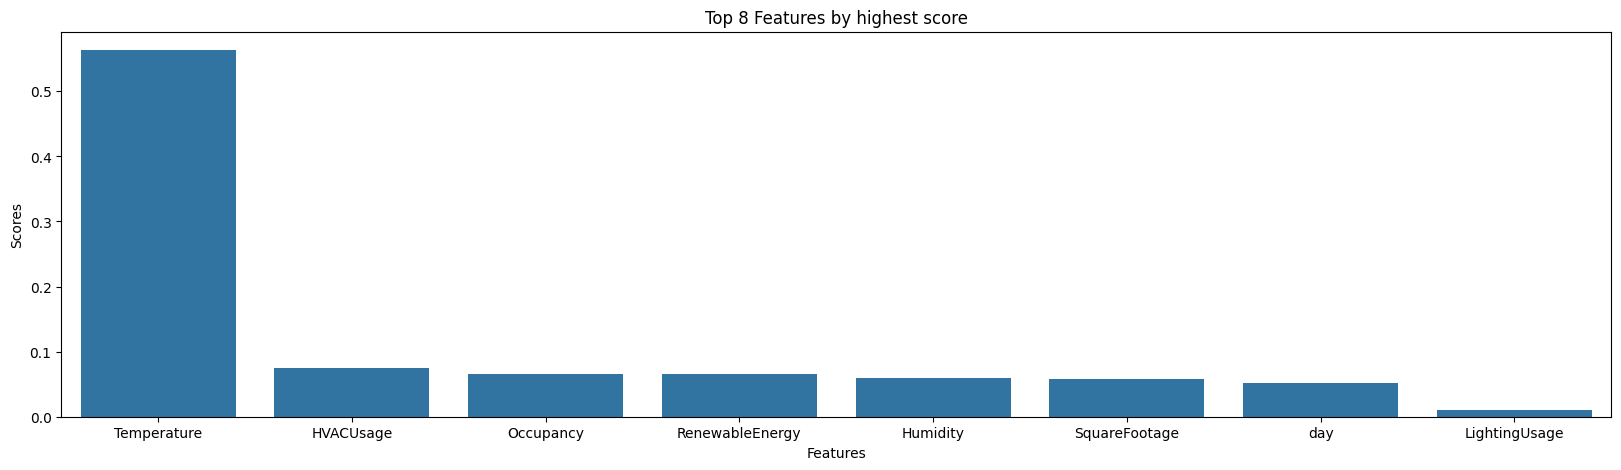

In [153]:
plt.figure(figsize=(20,5))
sns.barplot(data=scores_df.sort_values(by='Score', ascending=False).head(8), x='Feature', y='Score')
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Top 8 Features by highest score")
plt.show()

Inference: 
- Below are the 8 features found to be important based on Randomn Forest Regressor to run a model against target variable EnergyConsumption

['Temperature', 'HVACUsage', 'Occupancy', 'RenewableEnergy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage']

Conclusion:
- Energy Consumption dataset consists of 1007 records and 11 fields, however, 7 records are found to be as is duplicates
- There are 9 records with null values of 3 continuous variables that were replaced with mean of the respective column
- Timestamp field is found to be categorical type and extracted month field out of it to see if any inference can be drawn against EnergyConsumption variable
- Jan month has 75% data distribution from source and Feb with 25%
- Furthermore, Energy consumption is found to be pretty high during the first fortnight of every month
- Also, Renewable Energy is found to be having uniform distribution when compared with Energy Consumption variable which is Normally distributed across mean 75-80
- Temperature variable is found to be positively correlated with EnergyConsumption target variable
- Seggregated variables that are ranging beyond value 1 and ran MinMaxScaler method over it
- Finally, ran RandomnForestRegressor over feature engineered data set to pick the top 8 variables and are ['Temperature', 'HVACUsage', 'Occupancy', 'RenewableEnergy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage'] as follows
